### CellStrat Hub Pack - Machine Learning

#### ML5 - Diabetes Prediction with Logistic Regression

#### Import modules

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

#### Define Input and Output

In [2]:
#pima = np.loadtxt('../data/pima-indians-diabetes.data', delimiter=',')
pima = np.loadtxt('pima-indians-diabetes.data', delimiter=',')

##Attribute Information:
#1. Number of times pregnant
#2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#3. Diastolic blood pressure (mm Hg)
#4. Triceps skin fold thickness (mm)
#5. 2-Hour serum insulin (mu U/ml)
#6. Body mass index (weight in kg/(height in m)^2)
#7. Diabetes pedigree function
#8. Age (years)
#9. Class variable (0 or 1)

#### Preprocess the data

In [3]:
pima[np.where(pima[:,0]>8),0] = 8 #Pregnancy-more than 8 should be taken as 8
pima[np.where(pima[:,7]<=30),7] = 1 #quantize the age in 5 buckets
pima[np.where((pima[:,7]>30) & (pima[:,7]<=40)),7] = 2
pima[np.where((pima[:,7]>40) & (pima[:,7]<=50)),7] = 3
pima[np.where((pima[:,7]>50) & (pima[:,7]<=60)),7] = 4
pima[np.where(pima[:,7]>60),7] = 5

#### Create X and Y data

In [4]:
X = pima[:, [1, 5]] #we consider only two input features (Plasma glucose concentration and body mass index)
y = pima[:,8:9]
print('Class labels:', np.unique(y))

Class labels: [0. 1.]


In [5]:
# Splitting data into 70% training and 30% test data:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=1, stratify=y)
y_train = np.array(y_train.ravel())
y_test = np.array(y_test.ravel())

# Standardizing the features:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### Train and evaluate the data

In [6]:
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print(lr.coef_)

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.2f' % lr.score(X_test_std, y_test))

[[1.13459836 0.62513976]]
Misclassified samples: 59
Accuracy: 0.74
Accuracy: 0.74


#### Define the plotting function

In [7]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

    if test_idx:   # # highlight test samples.
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=1.0,linewidth=1,
                    marker='o', s=100, label='test set')

#### Plot the decision boundary

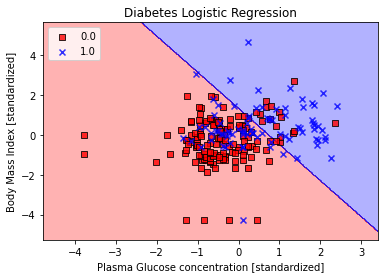

In [8]:
plot_decision_regions(X_test_std, y_test, classifier=lr)

#plt.xlabel('BP [standardized]')
#plt.ylabel('Triceps Thickness [standardized]')
plt.xlabel('Plasma Glucose concentration [standardized]')
plt.ylabel('Body Mass Index [standardized]')
plt.legend(loc='upper left')
plt.title('Diabetes Logistic Regression')
plt.show()